<a href="https://colab.research.google.com/github/dwifristanti/custom-model-object-detection/blob/master/custom_model_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Enable and Testing GPU**

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
print(tf.__version__)

2.5.0


### **Unzip the training_demo that consist of data, pipeline, etc**

In [ ]:
!unzip /content/training_demo.zip

Archive:  /content/training_demo.zip
   creating: training_demo/
   creating: training_demo/annotations/
  inflating: training_demo/annotations/label_map.pbtxt  
  inflating: training_demo/annotations/test.record  
  inflating: training_demo/annotations/train.record  
  inflating: training_demo/exporter_main_v2.py  
  inflating: training_demo/export_tflite_graph_tf2.py  
  inflating: training_demo/generate_tfrecord.py  
   creating: training_demo/models/
  inflating: training_demo/models/pipeline.config  
  inflating: training_demo/model_main_tf2.py  
   creating: training_demo/New folder/
   creating: training_demo/pre-trained-models/


### **Clone Tensorflow Models**

In [ ]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 57631, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 57631 (delta 21), reused 35 (delta 9), pack-reused 57578
Receiving objects: 100% (57631/57631), 572.71 MiB | 18.95 MiB/s, done.
Resolving deltas: 100% (39964/39964), done.


In [ ]:
cd /content/models/research

/content/models/research


### **Install Object Detection API**

In [ ]:
#Protobuf Installation
!protoc object_detection/protos/*.proto --python_out=.

In [ ]:
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 19.58 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [ ]:
cd cocoapi/PythonAPI

/content/models/research/cocoapi/PythonAPI


In [ ]:
!make

python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/models/research/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-OGiuun/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-OGiuun/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/n

In [ ]:
cp -r pycocotools /content/models/research

In [ ]:
cd ..

/content/models/research/cocoapi


In [ ]:
cd ..

/content/models/research


In [ ]:
cp object_detection/packages/tf2/setup.py .

In [ ]:
!python -m pip install .

Processing /content/models/research
     |████████████████████████████████| 9.6MB 14.2MB/s 
     |████████████████████████████████| 358kB 47.4MB/s 
     |████████████████████████████████| 1.6MB 47.4MB/s 
     |████████████████████████████████| 829kB 38.8MB/s 
     |████████████████████████████████| 153kB 42.9MB/s 
     |████████████████████████████████| 61kB 9.6MB/s 
     |████████████████████████████████| 2.3MB 46.9MB/s 
     |████████████████████████████████| 686kB 41.6MB/s 
     |████████████████████████████████| 38.2MB 81kB/s 
     |████████████████████████████████| 61kB 9.2MB/s 
     |████████████████████████████████| 645kB 38.2MB/s 
     |████████████████████████████████| 102kB 13.0MB/s 
     |████████████████████████████████| 51kB 8.9MB/s 
     |████████████████████████████████| 174kB 48.6MB/s 
     |████████████████████████████████| 1.2MB 47.0MB/s 
  Created wheel for object-detection: filename=object_detection-0.1-cp37-none-any.whl size=1650081 sha256=edb342357a1e974e7fefea088

In [ ]:
#Test Installation
!python object_detection/builders/model_builder_tf2_test.py

2021-06-02 17:53:05.478110: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Running tests under Python 3.7.10: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-06-02 17:53:07.498619: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-02 17:53:07.504227: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-02 17:53:07.504825: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-06-02 17:53:07.504859: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfull

### **Clone Pre-trained-models**

In [ ]:
cd /content/training_demo/pre-trained-models

/content/training_demo/pre-trained-models


In [ ]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz

--2021-06-02 17:56:56--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 108.177.98.128, 2607:f8b0:400e:c07::80
Connecting to download.tensorflow.org (download.tensorflow.org)|108.177.98.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 386527459 (369M) [application/x-tar]
Saving to: ‘ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz’

ssd_resnet101_v1_fp 100%[===================>] 368.62M   256MB/s    in 1.4s    

2021-06-02 17:56:57 (256 MB/s) - ‘ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz’ saved [386527459/386527459]



In [ ]:
!tar -xvf /content/training_demo/pre-trained-models/ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz

ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/checkpoint
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/pipeline.config
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/saved_model.pb
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/assets/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.index


### **Train our custom models**

In [ ]:
pwd

'/content/training_demo/pre-trained-models'

In [ ]:
cd ..

/content/training_demo


In [ ]:
!python model_main_tf2.py --model_dir=/content/training_demo/models/my_ssd_resnet50_v1_fpn --pipeline_config_path=/content/training_demo/models/my_ssd_resnet50_v1_fpn/pipeline.config

2021-06-02 18:06:18.356595: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-02 18:06:20.141505: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-02 18:06:20.147482: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-02 18:06:20.148058: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-06-02 18:06:20.148098: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-02 18:06:20.150677: I tensorflow/stream_executor/platform/default

In [ ]:
!python model_main_tf2.py --model_dir=/content/training_demo/models/my_ssd_resnet50_v1_fpn --pipeline_config_path=/content/training_demo/models/my_ssd_resnet50_v1_fpn/pipeline.config --checkpoint_dir=/content/training_demo/models/my_ssd_resnet50_v1_fpn

2021-06-02 18:24:01.310302: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
W0602 18:24:03.194276 140015114413952 model_lib_v2.py:1064] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0602 18:24:03.194488 140015114413952 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0602 18:24:03.194582 140015114413952 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0602 18:24:03.194672 140015114413952 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0602 18:24:03.194804 140015114413952 model_lib_v2.py:1085] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2021-06-02 18:24:03.200969: I tensorflow/stream_executor/

### **Export our trained model**

In [ ]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/training_demo/models/my_ssd_resnet50_v1_fpn/pipeline.config --trained_checkpoint_dir /content/training_demo/models/my_ssd_resnet50_v1_fpn --output_directory /content/training_demo/exported-models/my_model

2021-06-02 19:35:22.131521: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-02 19:35:23.829129: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-02 19:35:23.835005: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-02 19:35:23.835568: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-06-02 19:35:23.835607: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-02 19:35:23.838201: I tensorflow/stream_executor/platform/default

### **Inferencing our models**

Loading model...Done! Took 21.37407374382019 seconds
Running inference for /content/training_demo/images/test/table (2).jpg... Done


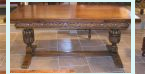

In [ ]:
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# PROVIDE PATH TO IMAGE DIRECTORY
IMAGE_PATHS = '/content/training_demo/images/test/table (2).jpg'


# PROVIDE PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR = '/content/training_demo/exported-models/my_model'

# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = '/content/training_demo/annotations/label_map.pbtxt'

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.60)

# LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))




print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

# SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=0.5,
      agnostic_mode=False)

print('Done')
# DISPLAYS OUTPUT IMAGE
cv2_imshow(image_with_detections)
# CLOSES WINDOW ONCE KEY IS PRESSED

### **Zip Model Directory**

In [ ]:
!shutil.make_archive("exported-models","zip", /content/training_demo/exported-models/my_model)

/bin/bash: -c: line 0: syntax error near unexpected token `"exported-models","zip",'
/bin/bash: -c: line 0: `shutil.make_archive("exported-models","zip", /content/training_demo/exported-models/my_model)'


### **tflite converter**

In [ ]:
tflite_convert \ 
--output_file=face_ssd.tflite \
--graph_def_file=tflite_graph.pb \
--inference_type=QUANTIZED_UINT8 \
--input_shapes=1,320,320,3 \
--input_arrays normalized_input_image_tensor \
--output_arrays "TFLite_Detection_PostProcess,TFLite_Detection_PostProcess:1,TFLite_Detection_PostProcess:2,TFLite_Detection_PostProcess:3" \ 
--mean_values 128 \
--std_dev_values 128 \
--allow_custom_ops \
--change_concat_input_ranges=false \
--allow_nudging_weights_to_use_fast_gemm_kernel=true

Traceback (most recent call last):
  File "/usr/local/bin/tflite_convert", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python2.7/dist-packages/tensorflow_core/lite/python/tflite_convert.py", line 594, in main
    app.run(main=run_main, argv=sys.argv[:1])
  File "/usr/local/lib/python2.7/dist-packages/tensorflow_core/python/platform/app.py", line 40, in run
    _run(main=main, argv=argv, flags_parser=_parse_flags_tolerate_undef)
  File "/usr/local/lib/python2.7/dist-packages/absl/app.py", line 300, in run
    _run_main(main, args)
  File "/usr/local/lib/python2.7/dist-packages/absl/app.py", line 251, in _run_main
    sys.exit(main(argv))
  File "/usr/local/lib/python2.7/dist-packages/tensorflow_core/lite/python/tflite_convert.py", line 577, in run_main
    _convert_tf2_model(tflite_flags)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow_core/lite/python/tflite_convert.py", line 235, in _convert_tf2_model
    tflite_model = converter.convert()
  File "/usr/lo